# <font color=#003d5c>Métodos Ensamblados - Bagging</font>

¿Por qué estamos aprendiendo sobre Ensamblados?

- Método muy popular para mejorar el rendimiento predictivo de los modelos de aprendizaje automático
- Proporciona una base para comprender modelos más sofisticados

# <font color=#003d5c>Objetivos de la lección</font>

Los estudiantes podrán:

- Definir el ensamblaje y sus requisitos
- Identificar los dos métodos básicos de ensamblaje
- Decidir si el ensamblaje manual es un enfoque útil para un problema dado
- Explicar el bagging y cómo se puede aplicar a los árboles de decisión
- Explicar cómo se calculan el error **"out-of-bag"** y las importancias de las variables en un bagged tree.
- Explicar la diferencia entre bagged trees y Random Forests
- Construir y ajustar un modelo de Random Forest en scikit-learn
- Decidir si un Árbol de Decisión o un Random Forest es mejor modelo para un problema dado.

# <font color=#003d5c>1. Introducción</font>

El aprendizaje ensamblado es un tema ampliamente estudiado en la comunidad de Machine Learning. La idea principal detrás
de la metodología de ensamblaje es combinar varios clasificadores base para tener un clasificador que supera a cada uno de ellos.

El principio central en el aprendizaje ensamblado es **inducir perturbaciones aleatorias en el procedimiento de aprendizaje para producir varios clasificadores base a partir de un solo conjunto de entrenamiento, y luego combinar los resultados de los clasificadores base para poder realizar la predicción final**. Para inducir las permutaciones aleatorias y, por lo tanto, crear los diferentes clasificadores base, se han propuesto varios métodos, en particular:
* Bagging
* Pasting
* Random Forests 
* Random Patches  

Finalmente, después de que los clasificadores base hayan sido entrenados, generalmente se combinan usando cualquiera de los siguientes métodos:
* Mayoría de votos
* Votación ponderada  
* Stacking

## <font color=#003d5c>¿Qué es Ensamblado?</font>

** El aprendizaje ensamblado (o "conjunto") ** es el proceso de combinar varios modelos predictivos para producir un modelo combinado que es más preciso que cualquier modelo individual.

- ** Regresión: ** tomar el promedio de las predicciones
- ** Clasificación: ** vote y use la predicción más común, o tome el promedio de las probabilidades pronosticadas

** Idea base: ** Si tienen una colección de modelos individualmente imperfectos (e independientes), los errores "únicos" hechos por cada modelo probablemente no serán hechos por el resto de los modelos, y por lo tanto los errores se descartarán al promediar los modelos.

Hay dos métodos básicos ** para el ensamblado: **

- Ensamble manual de sus modelos individuales
- Use un modelo que ensamble por usted

# <font color=#003d5c>2. Ensamblaje Manual</font>

¿Qué hace un buen modelo ensamblado manual?

- Diferentes tipos de ** modelos **
- Diferentes combinaciones de ** funciones **
- Diferentes ** parámetros de ajuste **

![Machine learning flowchart](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/crowdflower_ensembling.jpg)

*Esquema de desarrollo de un modelo de Machine learning creado por el [ganador](https://github.com/ChenglongChen/Kaggle_CrowdFlower) de la competencia de Kaggle [CrowdFlower](https://www.kaggle.com/c/crowdflower-search-relevance)*

In [1]:
# Leer el dataset de entrenamiento

# Transformar la variable "vtype"


# Leer el dataset de test

# Transformar la variable "vtype"


In [2]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0


### Entrenar diferentes modelos

En un diccionario, instanciar 4 técnicas de Aprendizaje Supervisado vistos hasta ahora, y que nos podrían ayudar a resolver este problema de regresión:
- Regresión Lineal
- Árbol de Regresión
- Naive Bayes
- KNN

Definir los predictores

In [4]:
predictores = ['year', 'miles', 'doors', 'vtype']

Definir los datasets de entrenamiento y prueba, y entrenar con cada técnica:

In [5]:
# Entrenar todos los modelos


Ahora debemos predecir con los datos de prueba usando cada uno de los 4 modelos entrenados. Para ello definamos un DataFrame con los mismos índices que el DataFrame de Prueba y las columnas con los nombres de las técnicas usadas.

Usando cada técnica, hay que predecir el precio:

Ahora evaluaremos el poder predictivo de cada técnica. Para ello importemos la métrica **mean_squared_error**

Usando cada técnica, hay que evaluar el error obtenido por sus predicciones:

lr 2138.35790287
dt 1000.0
nb 5477.22557505
nn 1671.32681823


### Evaluar el error de la media de las predicciones

0    3827.293063
1    5992.659754
2    9856.205190
dtype: float64

1326.6906044686111

¿Podemos utilizar la media ponderada?

679.09619433609419

Podemos hacer combinaciones de pesos

(2, 4, 1, 3)

679.09619433609419

## Comparación del ensamblaje manual con el enfoque de un solo modelo


**Ventajas del ensamblaje manual:**

- Incrementa la precisión predictiva
- Fácil de comenzar

** Desventajas del ensamblaje manual:**

- Disminuye la interpretabilidad
- Toma más tiempo para entrenar
- Toma más tiempo para predecir
- Más complejo para automatizar y mantener

# <font color=#003d5c>3. Bagging</font>

La principal debilidad de los ** árboles de decisión ** es que no tienden a tener la mejor precisión. Esto se debe en parte a la **alta varianza**, lo que significa que diferentes divisiones en los datos de entrenamiento pueden conducir a árboles muy diferentes.

**Bagging** es un procedimiento de propósito general que busca reducir la varianza de una técnica de Machine Learning, pero es particularmente útil para los árboles de decisión. Bagging es la abreviatura de **bootstrap aggregation**, que significa la agregación de muestras bootstrap.

Pero ... ¿Qué es una **muestra bootstrap**? Una muestra aleatoria con reemplazo. Veamos un ejemplo:

In [18]:
# Definimos una semilla para que nos de los mismos valores

# Crear un array de 1 x 20


# Obtener una muestra aleatoria de tamaño 20 con reemplazo


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]


**¿Cómo funciona el bagging (para árboles de decisión)? **

1. Construir B árboles utilizando B muestras de bootstrap a partir de los datos de entrenamiento.
2. Entrenar a cada árbol con su muestra Bootstrap correspondiente y luego predecir con cada uno.
3. Combinar las predicciones:
     - Promedio de las predicciones para ** árboles de regresión **
     - Haz un voto para ** árboles de clasificación **

Notas:

- ** Cada muestra Bootstrap ** debe ser del mismo tamaño que el conjunto de entrenamiento original.
- ** B ** debe ser un valor suficientemente grande para que el error parezca haberse "estabilizado". (Tuning)
- Los árboles ** crecen en profundidad ** por lo que tienen alta varianza.

Bagging aumenta la precisión al **reducir la varianza**, similar a cómo la validación cruzada reduce la varianza asociada con la división entrenamiento/prueba (para estimar el error fuera de muestra).

In [19]:
# Definimos una semilla para que nos de los mismos valores




# Crear 10 muestras bootstrap (seran usandos para elegir los registros del DataFrame)


[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [20]:
# Mostrar las filas para el primer árbol de decisión


,price,year,miles,doors,vtype
13,1300,1997,138000,4,0
2,13000,2010,73500,4,0
12,1800,1999,163000,2,1
2,13000,2010,73500,4,0
6,3000,2004,177000,4,0
1,14000,2010,30000,2,0
3,9500,2009,78000,4,0
10,2500,2003,190000,2,1
11,5000,2001,62000,4,0
9,1900,2003,160000,4,0


Construir un árbol de decisión por cada muestra

In [21]:


# Instanciar el árbol de regresión


# Crear un DataFrame para almacenar las predicciones del precio por cada árbol


# Entrenar un árbol por cada muestra bootstrap y hacer predicciones en el dataset de prueba






,0,1,2,3,4,5,6,7,8,9
0,1300.0,1300.0,3000.0,4000.0,1300.0,4000.0,4000.0,4000.0,3000.0,4000.0
1,5000.0,1300.0,3000.0,5000.0,5000.0,5000.0,4000.0,5000.0,5000.0,5000.0
2,14000.0,13000.0,13000.0,13000.0,13000.0,14000.0,13000.0,13000.0,9500.0,9000.0


Resultados de cada Árbol

0 1621.72747402
1 2942.78779391
2 1825.74185835
3 1000.0
4 1276.71453348
5 1414.21356237
6 1414.21356237
7 1000.0
8 1554.56317551
9 1914.85421551


Resultados del Ensamblado

0     2990.0
1     4330.0
2    12450.0
dtype: float64

998.58232843700307

## Árboles de Decisión con Bagging en scikit-learn (with B=500)

In [26]:
# Definir los conjuntos de entrenamiento y test





In [27]:
# Entrenar un BaggingRegressor usando DecisionTreeRegressor como "estimador base"



In [28]:
# Ajustar y predecir




array([  3344.2,   5395. ,  12902. ])

In [29]:
# calcular el RMSE


657.80003040437748

## Estimando el error out-of-sample

Para los modelos que usan bagging, el error out-of-sample se puede estimar sin usar la **división en entrenamiento/prueba** o la **validación cruzada**

En promedio cada bagged tree usa aproximadamente **dos tercios** (~66%) de las observaciones. Para cada árbol, las **observaciones restantes** se llaman observaciones "out-of-bag".

In [30]:
# Mostrar la primera muestra bootstrap


array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [31]:
# Mostar las observaciones "en-bolsa" por cada muestra
porcentaje_average=0
for sample in samples:
    print(set(sample))
    print((len(set(sample))*100.0)/n_samples)
    porcentaje_average+=(len(set(sample))*100.0)/n_samples
porcentaje_average/len(samples)

{0, 1, 2, 3, 6, 9, 10, 11, 12, 13}
71.42857142857143
{0, 1, 2, 3, 4, 7, 9, 13}
57.142857142857146
{0, 2, 3, 4, 6, 7, 8, 9, 12, 13}
71.42857142857143
{0, 1, 2, 3, 5, 6, 8, 10, 11, 12}
71.42857142857143
{2, 3, 4, 6, 10, 11, 12, 13}
57.142857142857146
{0, 1, 4, 5, 6, 7, 9, 10, 11}
64.28571428571429
{0, 1, 2, 3, 4, 5, 8, 9, 12}
64.28571428571429
{1, 2, 3, 5, 6, 7, 9, 11}
57.142857142857146
{1, 3, 6, 7, 8, 9, 11, 12}
57.142857142857146
{0, 1, 3, 4, 5, 6, 8, 10, 11, 13}
71.42857142857143


64.28571428571429

In [32]:
# Mostrar las observaciones "fuera-de-bolsa" por cada muestra
for sample in samples:
    print(sorted(set(range(n_samples)) - set(sample)))

[4, 5, 7, 8]
[5, 6, 8, 10, 11, 12]
[1, 5, 10, 11]
[4, 7, 9, 13]
[0, 1, 5, 7, 8, 9]
[2, 3, 8, 12, 13]
[6, 7, 10, 11, 13]
[0, 4, 8, 10, 12, 13]
[0, 2, 4, 5, 10, 13]
[2, 7, 9, 12]


Cómo calcular el error **"out-of-bag"**:

1. Para cada observación en los datos de entrenamiento, prediga su valor de respuesta usando ** solo ** los árboles en los que esa observación fue un out-of-bag. Promedia esas predicciones (para la regresión) o toma un voto (para la clasificación).
2. Compare todas las predicciones con los valores de respuesta reales para calcular el error out-of-bag error.

Cuando B es suficientemente grande, el  **out-of-bag error**  es una estimación precisa de **out-of-sample error**.

In [33]:
# Calcular el score R2 "fuera de bolsa" (Coeficiente de Determinacion) para B=500
bagreg.oob_score_

0.79869551339899825

Este coeficiente determina la calidad del modelo para replicar los resultados. Para ver las muestras Bootstrap:

In [34]:
X_train.loc[~bagreg.estimators_samples_[0]]

,year,miles,doors,vtype
0,2012,13000,2,0
3,2009,78000,4,0
5,2006,124000,2,0
8,2003,138000,2,0


In [35]:
X_train['index'] = X_train.index

In [36]:
dRowPred = {}
for i in range(X_train.shape[0]):
    print("Registro #{0}".format(i))
    dRowPred[i] = []
    for j in range(500):
        if i in X_train.loc[~bagreg.estimators_samples_[j], 'index'].unique().tolist():
            dRowPred[i].append(bagreg.estimators_[j].predict(X_train.loc[[i], predictores])[0])
            #print(bagreg.estimators_[j].predict(X_train.loc[[i], predictores])[0])

Registro #0
Registro #1
Registro #2
Registro #3
Registro #4
Registro #5
Registro #6
Registro #7
Registro #8
Registro #9
Registro #10
Registro #11
Registro #12
Registro #13


In [37]:
dRowAvgPred = []
for i in dRowPred.keys():
    dRowAvgPred.append({'index':i ,'pred': np.mean(dRowPred[i])})

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_train, pd.DataFrame(dRowAvgPred)['pred'])

0.79869551339899825

In [40]:
np.sqrt(mean_squared_error(y_train, pd.DataFrame(dRowAvgPred)['pred']))

2663.7438399091916

## Estimar la importancia de las características

Usar Bagging aumenta **la precisión predictiva**, pero disminuye la **interpretabilidad del modelo** porque ya no es posible visualizar el árbol para comprender la importancia de cada característica.

Sin embargo, aún podemos obtener un resumen general de las **importancias de la variables** de los modelos con bagging:

- **Bagged regression trees:** calcula la cantidad total de **MSE** que se reduce debido a divisiones sobre una característica dada, promediada sobre todos los árboles.
- **Bagged classification trees:** calcula la cantidad total del **índice de Gini** que disminuye debido a las divisiones sobre una característica determinada, promediada en todos los árboles.

# <font color=#003d5c>4. Random Forests</font>

Random Forests es una **ligera variación de árboles con bagging** que tiene un rendimiento aún mejor:

- Exactamente como el bagging, creamos un conjunto de árboles de decisión utilizando muestras bootstrap del conjunto de entrenamiento.
- Sin embargo, al construir cada árbol, cada vez que se considera una división, se elige una **muestra aleatoria de m características** como candidatos para dividir del **conjunto completo de características p**. La división solo permite usar **una de esas m características**.
    - Se elige una nueva muestra aleatoria de características para ** cada árbol en cada división individual **.
    - Para ** clasificación **, se elige m típicamente como la raíz cuadrada de p.
    - Para ** regresión **, se elige m típicamente entre p/3 y p.

¿Cuál es el motivo?
- Supongamos que hay ** una característica muy fuerte ** en el conjunto de datos. Cuando se usan árboles con bagging, la mayoría de los árboles usarán esa característica como la división superior, lo que resulta en un conjunto de árboles similares **altamente correlacionados**.
- Promediar cantidades altamente correlacionadas no reduce significativamente la varianza (que es el objetivo total del bagging).
-  Al omitir aleatoriamente las características candidatas de cada división, **Random Forests "decorrelaciona" los árboles**, de modo que el proceso de promediado puede reducir la varianza del modelo resultante.

# <font color=#003d5c>5. Construir y afinar (tuning) Árboles de Decisiones y  Random Forests</font>

- Datos de clientes de un Banco (variables sociodemograficas, de comportamiento)
- Cada observación representa un cliente
- ** Objetivo: ** Predecir la aceptación de un crédito hipotecario

In [41]:
# Lectura del dataset
df = pd.read_csv('DS_Credito Hipotecario.csv')

df['SEXO'].fillna(df['SEXO'].mode()[0], inplace=True)
df['FLAG_CASADO'].fillna(df['FLAG_CASADO'].mode()[0], inplace=True)
df['NRO_DEPENDIENTES'].fillna(df['NRO_DEPENDIENTES'].mode()[0], inplace=True)
df['FLAG_TRAB_INDEP'].fillna(df['FLAG_TRAB_INDEP'].mode()[0], inplace=True)
df['INGRESOS_COSOLICITANTE'].fillna(df['INGRESOS_COSOLICITANTE'].mean(), inplace=True)
df['MONTO_PRESTAMO_MILES'].fillna(df['MONTO_PRESTAMO_MILES'].mean(), inplace=True)
df['PLAZO_PRESTAMO_MESES'].fillna(df['PLAZO_PRESTAMO_MESES'].mean(), inplace=True)
df['FLAG_HISTORIAL_CREDITICIO'].fillna(df['FLAG_HISTORIAL_CREDITICIO'].mode()[0], inplace=True)

df['SEXO'] = df['SEXO'].map({'Male': 0, 'Female': 1})
df['FLAG_CASADO'] = df['FLAG_CASADO'].map({'No': 0, 'Yes': 1})
df['EDUCACION'] = df['EDUCACION'].map({'Not Graduate': 0, 'Graduate': 1})
df['FLAG_TRAB_INDEP'] = df['FLAG_TRAB_INDEP'].map({'No': 0, 'Yes': 1})
df['FLAG_HISTORIAL_CREDITICIO'] = df['FLAG_HISTORIAL_CREDITICIO'].map({'Malo': 0, 'Bueno': 1})
df = pd.concat([df, pd.get_dummies(df['TIPO_ZONA'], prefix = 'TIPO_ZONA', drop_first = True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['NRO_DEPENDIENTES'], prefix = 'NRO_DEPENDIENTES', drop_first = True)], axis=1)
del df['TIPO_ZONA']
del df['NRO_DEPENDIENTES']
df['FLAG_CRED_HIPO'] = df['FLAG_CRED_HIPO'].map({'Y': 1, 'N': 0})

In [42]:
# Definir X e Y
predictores = ['SEXO', 'FLAG_CASADO', 'EDUCACION', 'FLAG_TRAB_INDEP', 'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
                'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES','FLAG_HISTORIAL_CREDITICIO', 'TIPO_ZONA_Semiurban',
                'TIPO_ZONA_Urban', 'NRO_DEPENDIENTES_1', 'NRO_DEPENDIENTES_2','NRO_DEPENDIENTES_3+']
X = df[predictores]
y = df.FLAG_CRED_HIPO

## Predecir el Crédito Hipotecario con un árbol de decisión

Encuentre el mejor ** max_depth ** para un árbol de decisión usando la validación cruzada:

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Lista de valores para "max_depth"
max_depth_range = range(1, 21)

# Definir un lista para almacenar los promedios de los Auc por cada valor de "max_depth"
auc_scores = []

# Usa una validación cruzada de 10 folds con cada valor del "max_depth"
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treecla = DecisionTreeClassifier(max_depth=depth, random_state=1)
    auc_score = cross_val_score(treecla, X, y, cv=10, scoring='roc_auc')
    auc_scores.append(np.mean(auc_score))

C:\Users\S73984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

Text(0,0.5,'AUC')

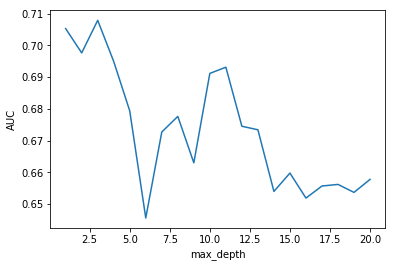

In [45]:
# Graficar max_depth (eje x) versus AUC (eje y)
plt.plot(max_depth_range, auc_scores)
plt.xlabel('max_depth')
plt.ylabel('AUC')

In [46]:
# Mostra el mejor AUC y el correspondiente "max_depth"
sorted(zip(auc_scores, max_depth_range), reverse=True)[0]

(0.70785364574226273, 3)

In [47]:
# max_depth=3 fue el mejor, por lo que hay que entrenar un arbol usando ese valor de hiperparametro
treecla = DecisionTreeClassifier(max_depth=3, random_state=1)
treecla.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [48]:
# Calcular la importancia de variables
pd.DataFrame({'predictor':predictores, 'importancia':treecla.feature_importances_}).sort_values('importancia', ascending=False)

,importancia,predictor
8,0.887584,FLAG_HISTORIAL_CREDITICIO
5,0.049299,INGRESOS_COSOLICITANTE
9,0.043354,TIPO_ZONA_Semiurban
6,0.019762,MONTO_PRESTAMO_MILES
0,0.000000,SEXO
1,0.000000,FLAG_CASADO
2,0.000000,EDUCACION
3,0.000000,FLAG_TRAB_INDEP
4,0.000000,INGRESOS_SOLICITANTE
7,0.000000,PLAZO_PRESTAMO_MESES


## Predecir el Crédito Hipotecario con Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Tuning n_estimators

Un hiperparámetro importante es **n_estimators**, que es la cantidad de árboles que se deben entrenar. Debe ser un valor lo suficientemente grande como para que el error parezca haberse "estabilizado".

In [50]:
# Listar los valores a probar


# Definir un lista para almacenar los promedios de los Auc por cada valor de "n_estimators"


# Usa una validación cruzada de 5 folds con cada valor del "n_estimators"





Text(0,0.5,'AUC')

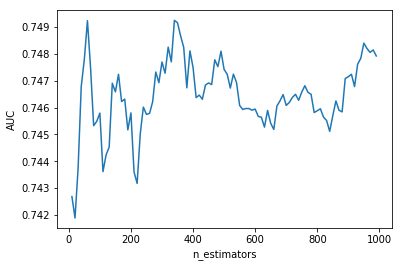

In [51]:
# Graficar n_estimators (eje x) versus AUC (eje y)
plt.plot(estimator_range, AUC_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC')

In [52]:
# Mostrar el mejor AUC y su correpondiente "n_estimators"


(0.74925251477109067, 340)

### Tuning max_features

El otro parámetro de ajuste importante es ** max_features **, que es el número de características que se deben considerar en cada división.

In [53]:
# Listar los valores para "max_features"


# Definir un lista para almacenar los promedios de los Auc por cada valor de "max_features"


# Use una validación cruzada de 10 folds para cada valor de "max_features"





Text(0,0.5,'AUC')

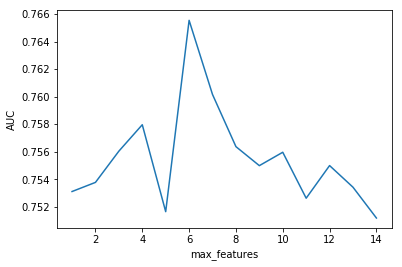

In [55]:
# Graficar max_features (eje x) versus AUC (eje y)
plt.plot(feature_range, AUC_scores)
plt.xlabel('max_features')
plt.ylabel('AUC')

In [56]:
# Mostrar el mejor AUC y su correpondiente "max_features"


(0.76554103281459462, 6)

### Ajustando un Random Forest con los mejores parámetros

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [58]:
# Calcular la importancia de variables


,feature,importance
8,FLAG_HISTORIAL_CREDITICIO,0.276053
4,INGRESOS_SOLICITANTE,0.202521
6,MONTO_PRESTAMO_MILES,0.177731
5,INGRESOS_COSOLICITANTE,0.124366
7,PLAZO_PRESTAMO_MESES,0.040976
2,EDUCACION,0.026562
1,FLAG_CASADO,0.023847
9,TIPO_ZONA_Semiurban,0.023518
11,NRO_DEPENDIENTES_1,0.021701
10,TIPO_ZONA_Urban,0.019988


## Comparando Random Forests con Árboles de Decisiones

**Ventajas de Random Forests:**

- El rendimiento es competitivo con los mejores métodos de aprendizaje supervisado
- Proporciona una estimación más confiable de la importancia de las características (features)
- Le permite estimar el error fuera de muestra sin usar entrenamiento / prueba dividida o validación cruzada

**Desventajas de Random Forests:**

- Menos interpretable
- Más lento para entrenar
- Más lento para predecir